Project Overview
The Movie Rating Prediction project involves analyzing a dataset containing information about Indian movies. The dataset includes details like movie name, year, duration, genre, rating, votes, director, and three main actors. The data will be used to build a predictive model for movie ratings and extract valuable insights from the movie industry.

Business Understanding
The film industry relies on understanding the factors that influence movie success. Accurately predicting movie ratings can aid in decision-making, such as choosing the right actors, directors, and genres, as well as determining marketing strategies. This project aims to provide insights and a model for predicting movie ratings, which can be invaluable for stakeholders in the movie industry.

Objectives
Develop a predictive model: Create a machine learning model to predict movie ratings based on the provided dataset.This is essentially a regression problem, where we aim to estimate the numerical movie ratings based on various features.

Identify influential factors: Analyze the dataset to determine which factors (e.g., genre, director, actors) have the most significant impact on movie ratings.

Provide actionable insights: Offer insights to the film industry stakeholders to make informed decisions about movie production, casting, and marketing.

Data Understanding
The dataset is obtained from Kaggle: IMDb India Movies

The dataset has the following columns:

Name: Movie name
Year: release year of the movies
Duration: Movie duration
Genre: Movie genre
Rating: Movie rating
Votes: Number of votes received
Director: Movie director
Actor 1: First main actor
Actor 2: Second main actor
Actor 3: Third main actor

The Target variable is Rating

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from scipy import stats
import seaborn as sns

from sklearn.preprocessing import OneHotEncoder, MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import GradientBoostingRegressor


import warnings

In [9]:
# load the dataset
file_path = "D:/Shreya/Codesoft/MovieRating/IMDb Movies India.csv"
df = pd.read_csv(file_path,encoding='ISO-8859-1')
#df = pd.read_csv("D:/Shreya/Codesoft/MovieRating/IMDb Movies India.csv",encoding='ISO-8859-1')
df.head()

,Name,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3
0,,NaN,NaN,Drama,NaN,NaN,J.S. Randhawa,Manmauji,Birbal,Rajendra Bhatia
1,#Gadhvi (He thought he was Gandhi),(2019),109 min,Drama,7.0,8,Gaurav Bakshi,Rasika Dugal,Vivek Ghamande,Arvind Jangid
2,#Homecoming,(2021),90 min,"Drama, Musical",NaN,NaN,Soumyajit Majumdar,Sayani Gupta,Plabita Borthakur,Roy Angana
3,#Yaaram,(2019),110 min,"Comedy, Romance",4.4,35,Ovais Khan,Prateik,Ishita Raj,Siddhant Kapoor
4,...And Once Again,(2010),105 min,Drama,NaN,NaN,Amol Palekar,Rajat Kapoor,Rituparna Sengupta,Antara Mali


In [10]:
#get information about the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15509 entries, 0 to 15508
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Name      15509 non-null  object 
 1   Year      14981 non-null  object 
 2   Duration  7240 non-null   object 
 3   Genre     13632 non-null  object 
 4   Rating    7919 non-null   float64
 5   Votes     7920 non-null   object 
 6   Director  14984 non-null  object 
 7   Actor 1   13892 non-null  object 
 8   Actor 2   13125 non-null  object 
 9   Actor 3   12365 non-null  object 
dtypes: float64(1), object(9)
memory usage: 1.2+ MB


In [11]:
# get summary statistics of the datset
df.describe()

,Rating
count,7919.000000
mean,5.841621
std,1.381777
min,1.100000
25%,4.900000
50%,6.000000
75%,6.800000
max,10.000000


In [12]:
df.dtypes

Name         object
Year         object
Duration     object
Genre        object
Rating      float64
Votes        object
Director     object
Actor 1      object
Actor 2      object
Actor 3      object
dtype: object

df.shape

# Data Preparation

Data Preparation

In [16]:
df.isna().sum()

Name           0
Year         528
Duration    8269
Genre       1877
Rating      7590
Votes       7589
Director     525
Actor 1     1617
Actor 2     2384
Actor 3     3144
dtype: int64

# Dealing with the missing values

The rows from our dataset where the 'Rating' information was not available is droppped

In [17]:
df.dropna(subset=['Rating'], inplace=True)

In [19]:
df.isna().sum()

Name           0
Year           0
Duration    2068
Genre        102
Rating         0
Votes          0
Director       5
Actor 1      125
Actor 2      200
Actor 3      292
dtype: int64

The missing entries in Genre will be replaced by Unknown

In [20]:
df['Genre'].fillna('Unknown', inplace=True)

In [21]:
df.isna().sum()

Name           0
Year           0
Duration    2068
Genre          0
Rating         0
Votes          0
Director       5
Actor 1      125
Actor 2      200
Actor 3      292
dtype: int64

In [23]:
# Extract numeric values from 'Duration' and convert to integers
df['Duration'] = df['Duration'].str.extract(r'(\d+)').astype(float)

# Impute missing values in 'Duration' with the median
df['Duration'].fillna(df['Duration'].median(), inplace=True)

The missing entries in the subset Actor 1, actor 2 and actor 3 will be dropped

In [24]:
df.dropna(subset=['Actor 1', 'Actor 2', 'Actor 3'], inplace=True)

In [25]:
df.isna().sum()

Name        0
Year        0
Duration    0
Genre       0
Rating      0
Votes       0
Director    0
Actor 1     0
Actor 2     0
Actor 3     0
dtype: int64

# Check for duplicates

In [26]:
df.duplicated().sum()

0

In [27]:
df.dtypes

Name         object
Year         object
Duration    float64
Genre        object
Rating      float64
Votes        object
Director     object
Actor 1      object
Actor 2      object
Actor 3      object
dtype: object

Change the data type of both Year and Votes column to numerical data types

In [28]:
df['Year'] = df['Year'].str.extract(r'(\d+)').astype(int)

In [29]:
df['Votes'] = df['Votes'].str.extract(r'(\d+)').astype(int)

In [30]:
df.dtypes

Name         object
Year          int32
Duration    float64
Genre        object
Rating      float64
Votes         int32
Director     object
Actor 1      object
Actor 2      object
Actor 3      object
dtype: object

In [31]:
# preview the clean dataset
df.head()

,Name,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3
1,#Gadhvi (He thought he was Gandhi),2019,109.0,Drama,7.0,8,Gaurav Bakshi,Rasika Dugal,Vivek Ghamande,Arvind Jangid
3,#Yaaram,2019,110.0,"Comedy, Romance",4.4,35,Ovais Khan,Prateik,Ishita Raj,Siddhant Kapoor
5,...Aur Pyaar Ho Gaya,1997,147.0,"Comedy, Drama, Musical",4.7,827,Rahul Rawail,Bobby Deol,Aishwarya Rai Bachchan,Shammi Kapoor
6,...Yahaan,2005,142.0,"Drama, Romance, War",7.4,1,Shoojit Sircar,Jimmy Sheirgill,Minissha Lamba,Yashpal Sharma
8,?: A Question Mark,2012,82.0,"Horror, Mystery, Thriller",5.6,326,Allyson Patel,Yash Dave,Muntazir Ahmad,Kiran Bhatia


Check for outliers and remove them

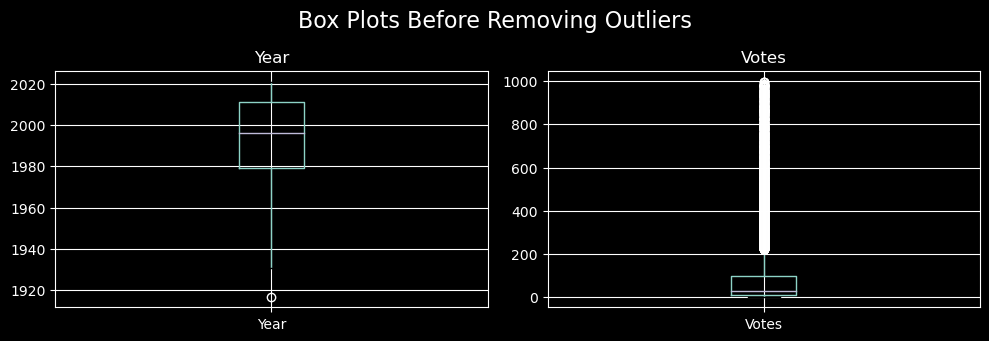

Number of rows with outliers before removal: 781


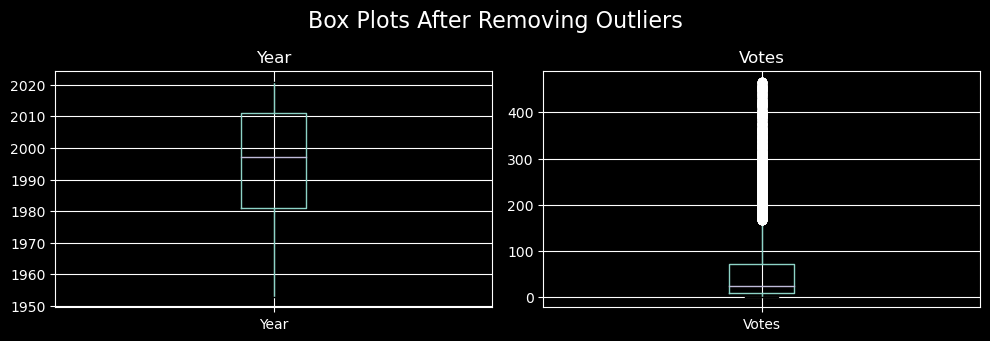

Number of rows after removing outliers: 6846


In [32]:
# Set the dark_background style
plt.style.use('dark_background')

# Define the numerical columns you want to check for outliers
numerical_columns = ['Year', 'Votes']

# Create box plots before removing outliers
plt.figure(figsize=(10, 6))
plt.suptitle('Box Plots Before Removing Outliers', fontsize=16)

for i, column in enumerate(numerical_columns, 1):
    plt.subplot(2, 2, i)
    df.boxplot(column=[column])
    plt.title(f'{column}')

plt.tight_layout()
plt.show()

# Calculate z-scores for numerical columns
z_scores = pd.DataFrame()
for column in numerical_columns:
    z_scores[column] = (df[column] - df[column].mean()) / df[column].std()

# Set a z-score threshold to identify outliers (e.g., 2 or -2 for a 95% confidence interval)
z_score_threshold = 2

# Identify outliers based on z-scores
outliers = z_scores[(z_scores.abs() > z_score_threshold).any(axis=1)]

# Display the number of rows with outliers before removal
print("Number of rows with outliers before removal:", len(outliers))

# Remove outliers and create a new DataFrame (df_cleaned)
df = df[~((z_scores.abs() > z_score_threshold).any(axis=1))]

# Create box plots after removing outliers
plt.figure(figsize=(10, 6))
plt.suptitle('Box Plots After Removing Outliers', fontsize=16)

for i, column in enumerate(numerical_columns, 1):
    plt.subplot(2, 2, i)
    df.boxplot(column=[column])
    plt.title(f'{column}')

plt.tight_layout()
plt.show()

# Display the number of rows after removing outliers
print("Number of rows after removing outliers:", len(df))

# Exploratory Data Analysis


Univariate analysis focuses on understanding the distribution and characteristics of individual variables

Rating Analysis

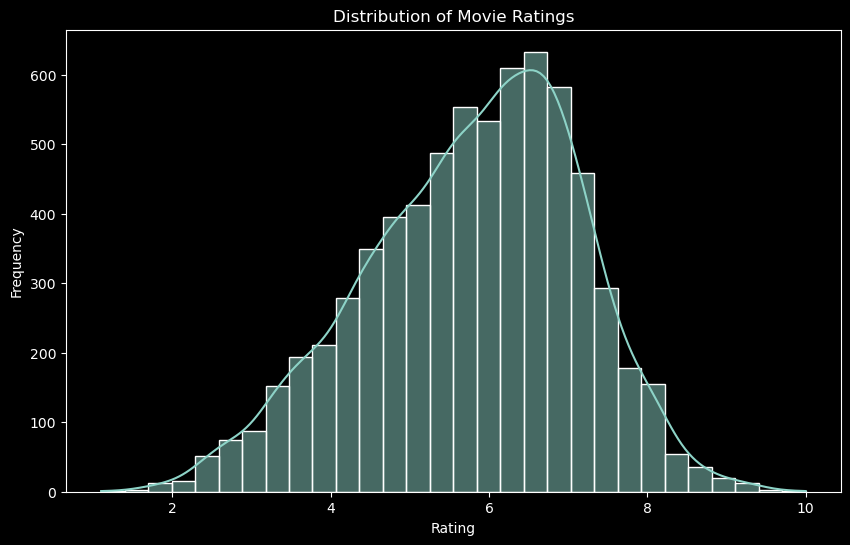

In [33]:
# rating analysis
plt.figure(figsize=(10, 6))
sns.histplot(data=df, x='Rating', bins=30, kde=True)
plt.title('Distribution of Movie Ratings')
plt.xlabel('Rating')
plt.ylabel('Frequency')
plt.show()

# Inferences

Rating Distribution: 
The histogram shows a slightly normal distribution with a peak around a 7 rating value.

Common Rating Range falls between 5 to 7.

All ratings are positive

There are few movies rated below 2 and above 8

# Votes Analysis

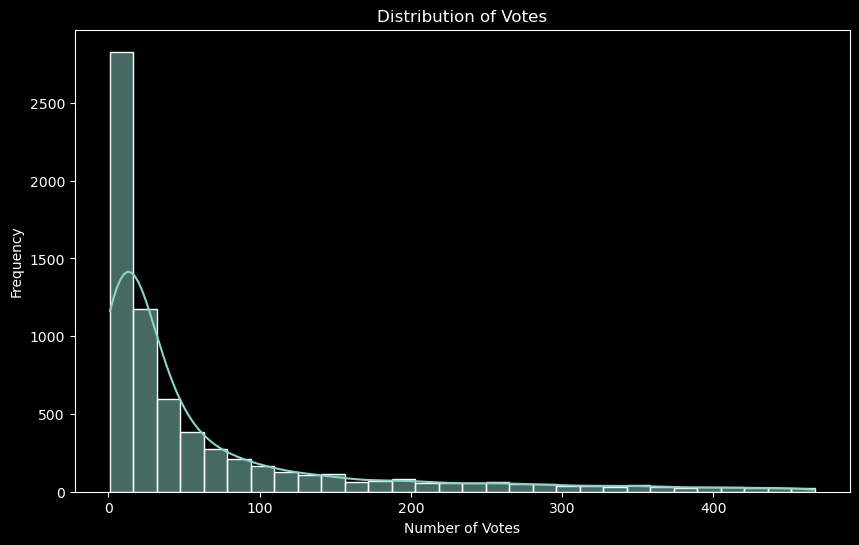

In [34]:
# Votes Analysis
plt.figure(figsize=(10, 6))
sns.histplot(data=df, x='Votes', bins=30, kde=True)
plt.title('Distribution of Votes')
plt.xlabel('Number of Votes')
plt.ylabel('Frequency')
plt.show()

# Inferences

The distribution of votes is right-skewed, with the majority of movies receiving a relatively low number of votes. 

This suggests that many movies in the dataset may not be widely recognized or popular, as they have received fewer votes
The long tail towards higher vote counts indicates that there are a smaller number of movies that 
have garnered a significant number of votes

Popularity Range is between 0 and 50

# Top 10 Directors with the Most Movies Directed

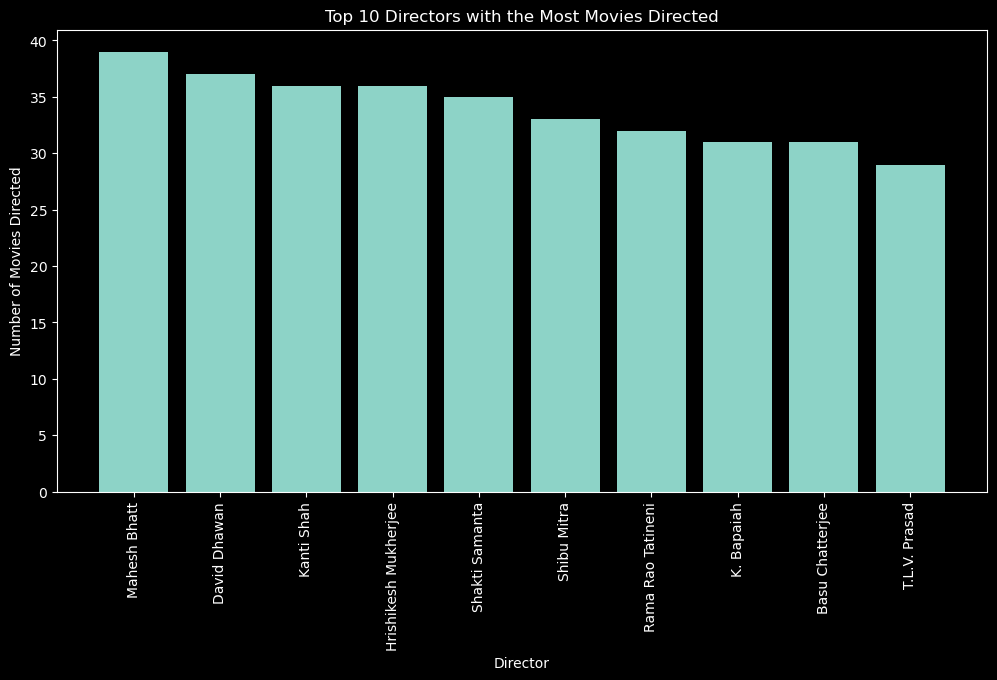

In [36]:
# Count the number of movies directed by each director
director_counts = df['Director'].value_counts()

# Select the top 10 directors with the most movies directed
top_10_directors = director_counts.head(10)

# Create a bar plot to visualize the top 10 directors with the most movies directed
plt.figure(figsize=(12, 6))
plt.bar(top_10_directors.index, top_10_directors.values),
plt.title('Top 10 Directors with the Most Movies Directed')
plt.xlabel('Director')
plt.ylabel('Number of Movies Directed')
plt.xticks(rotation=90)
plt.show()

# Inference

Saif Ali Sayeed has directed the most succcessful Movies among other directors.
This shows that the likelyhood of a movie to be rated high if directed by him is high.

Stakeholders in the film industry might consider collaborating with these directors to ensure 
the production of well-received movies.

# Top 10 Highly Rated Movie Genres

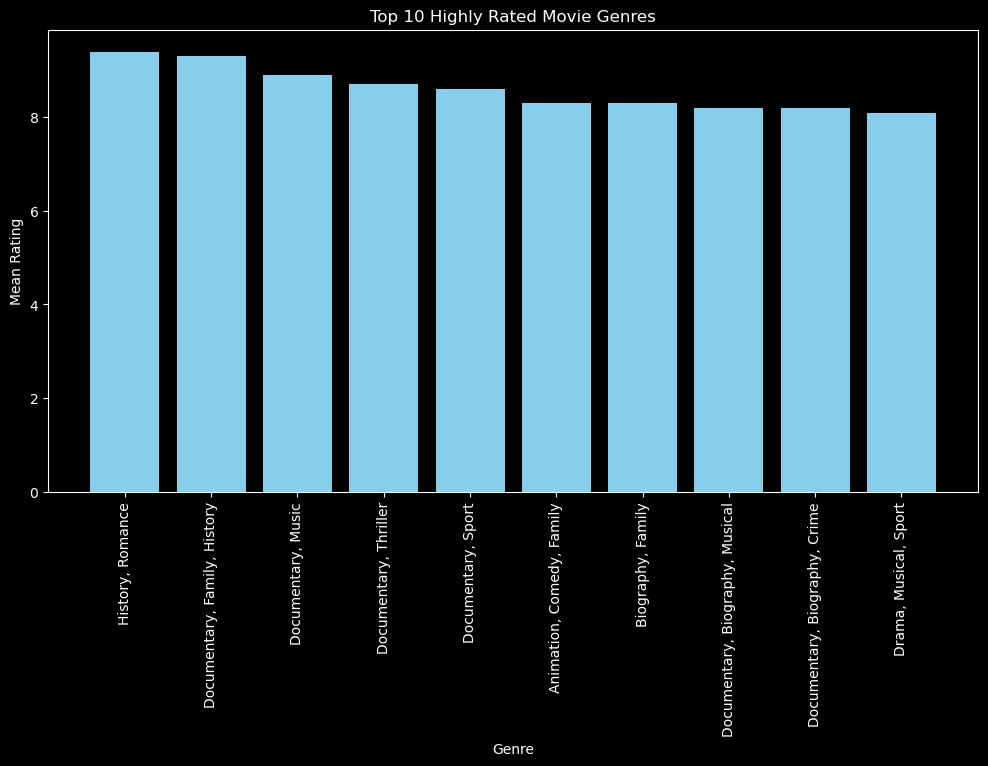

In [37]:
# Group the data by genre and calculate the mean rating for each genre
genre_mean_ratings = df.groupby('Genre')['Rating'].mean()

# Sort the genres by mean rating in descending order and select the top 10
top_10_genres = genre_mean_ratings.sort_values(ascending=False).head(10)

# Create a bar plot to visualize the top 10 highly rated genres
plt.figure(figsize=(12, 6))
plt.bar(top_10_genres.index, top_10_genres.values, color='skyblue')
plt.title('Top 10 Highly Rated Movie Genres')
plt.xlabel('Genre')
plt.ylabel('Mean Rating')
plt.xticks(rotation=90)
plt.show()

# Inference

Genre Popularity: The top 10 highly rated genres are likely to be popular among audiences, 
as reflected in their mean ratings

History, Romance genre has the highes rating hence wise to investing in the genre

Critical Acclaim: High mean ratings often indicate that these genres receive positive reviews and 
critical acclaim from both audiences and critics.

Filmmakers, actors, and production companies may consider collaborating within these genres to create well-received movies.

# Top 10 Years with Highest Average Ratings

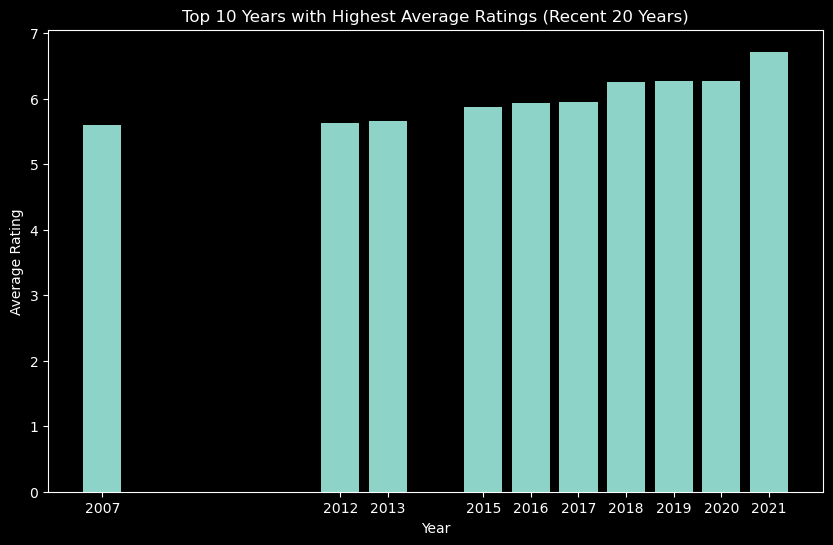

In [39]:
# Filter the DataFrame for the most recent 20 years
recent_years = df[df['Year'] >= (max(df['Year']) - 19)]

# Calculate the average rating per year
average_ratings = recent_years.groupby('Year')['Rating'].mean().reset_index()

# Sort the DataFrame by average rating in descending order and select the top 10 years
top_10_years = average_ratings.nlargest(10, 'Rating')

# Plot the top 10 years and their average ratings
plt.figure(figsize=(10, 6))
plt.bar(top_10_years['Year'], top_10_years['Rating'])
plt.xlabel('Year')
plt.ylabel('Average Rating')
plt.title('Top 10 Years with Highest Average Ratings (Recent 20 Years)')
plt.xticks(top_10_years['Year'])
plt.show()

Consistency: Over the recent 20 years, there seems to be a range of years with high average ratings, 
    
indicating some consistency in the quality of movies during those years

# Duration vs Rating

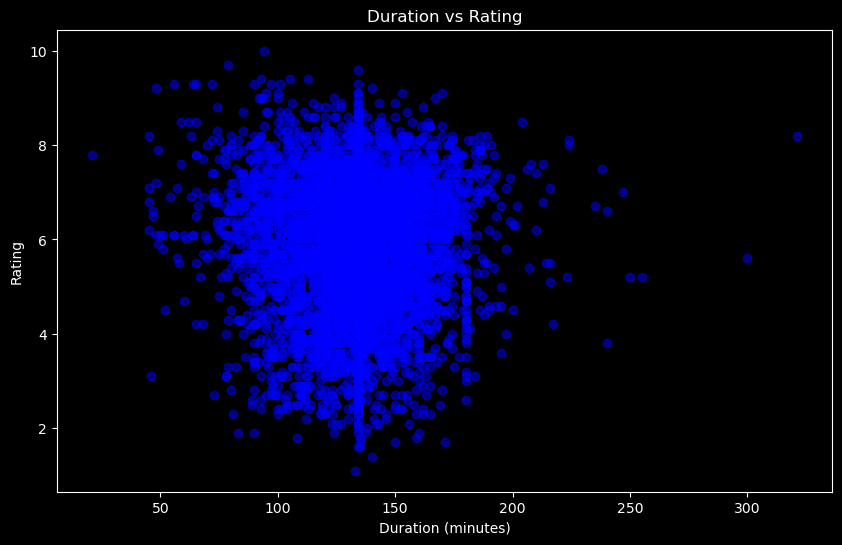

In [40]:
plt.figure(figsize=(10, 6))
plt.scatter(df['Duration'], df['Rating'], alpha=0.5, color='blue')
plt.xlabel('Duration (minutes)')
plt.ylabel('Rating')
plt.title('Duration vs Rating')
plt.show()

There doesn't appear to be a strong linear relationship between movie duration and ratings.you can't easily predict a movie's 

rating based solely on its duration.

# Multivariate Analysis

Multivariate analysis involves exploring the relationships between more than two variables.

# Correlation Matrix

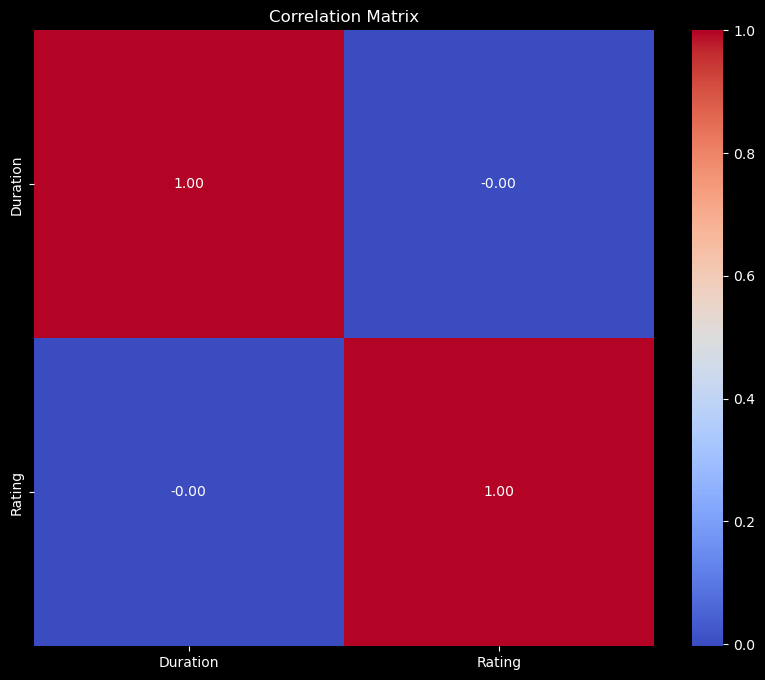

In [49]:
# Calculate the correlation matrix
corr_matrix = df.select_dtypes(include=['float64', 'int64']).corr()
#corr_matrix = df.corr()

# Create a heatmap to visualize correlations
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()

The variables are not Highly correlated. The absence of strong correlations between numerical variables is a positive sign, 

as it reduces the risk of multicollinearity in regression analysis

# Pairplot

C:\Users\DELL\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


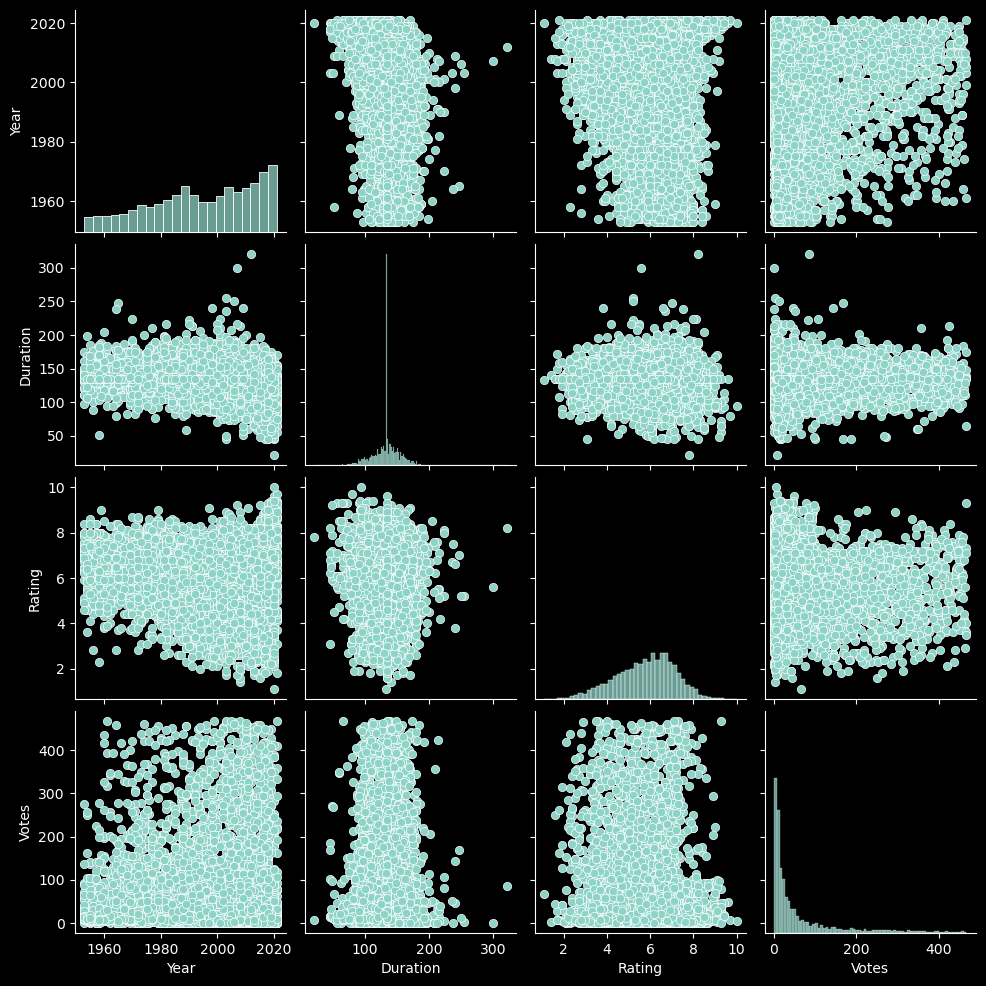

In [50]:
# Select the numerical variables for the pair plot
numerical_columns = df.select_dtypes(include=['number'])

# Create a pair plot for the numerical variables
sns.pairplot(numerical_columns)
plt.show()

No strong correlation between variables

# Data Preprocessing

Assign the variables

assigning y/ target variable to Rating column for prediction analysis and the rest of the features to independent variable X

In [51]:
X = df.drop('Rating', axis=1)
y = df['Rating']

In [52]:
X.head()

,Name,Year,Duration,Genre,Votes,Director,Actor 1,Actor 2,Actor 3
1,#Gadhvi (He thought he was Gandhi),2019,109.0,Drama,8,Gaurav Bakshi,Rasika Dugal,Vivek Ghamande,Arvind Jangid
3,#Yaaram,2019,110.0,"Comedy, Romance",35,Ovais Khan,Prateik,Ishita Raj,Siddhant Kapoor
6,...Yahaan,2005,142.0,"Drama, Romance, War",1,Shoojit Sircar,Jimmy Sheirgill,Minissha Lamba,Yashpal Sharma
8,?: A Question Mark,2012,82.0,"Horror, Mystery, Thriller",326,Allyson Patel,Yash Dave,Muntazir Ahmad,Kiran Bhatia
9,@Andheri,2014,116.0,"Action, Crime, Thriller",11,Biju Bhaskar Nair,Augustine,Fathima Babu,Byon


# Check for mutlicollinearity X

In [58]:
# Specify the categorical columns to be one-hot encoded
categorical_columns = ['Name', 'Genre', 'Director',
       'Actor 1', 'Actor 2', 'Actor 3']

# Initialize the OneHotEncoder
ohe = OneHotEncoder(sparse=False)

# Fit and transform the categorical columns
X_categorical_encoded = ohe.fit_transform(X[categorical_columns])

# Retrieve feature names for the encoded columns
feature_names = []
for i, col in enumerate(categorical_columns):
    categories = ohe.categories_[i]
    for category in categories:
        feature_names.append(f"{col}_{category}")

# Create a DataFrame for the encoded features
X_categorical_encoded_df = pd.DataFrame(X_categorical_encoded, columns=feature_names)
X_categorical_encoded_df.head()

C:\Users\DELL\anaconda3\Lib\site-packages\sklearn\preprocessing\_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


,Name_#Gadhvi (He thought he was Gandhi),Name_#Yaaram,Name_'Ferry',Name_'Sambandh',Name_...Yahaan,Name_102 Not Out,Name_10ml LOVE,Name_12 O'Clock,Name_127 B,Name_13B: Fear Has a New Address,...,Actor 3_Zareen Khan,Actor 3_Zarina Wahab,Actor 3_Zarine Ali,Actor 3_Zayed Khan,Actor 3_Zeenat Aman,Actor 3_Zeeshan Khan,Actor 3_Zeishan Quadri,Actor 3_Zenobia Shroff,Actor 3_Zoya Hussain,Actor 3_Zulfi Sayed
0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [59]:
# Specify the numerical columns to be scaled
numerical_columns = ['Year', 'Duration', 'Votes']

# Initialize the StandardScaler
scaler = MinMaxScaler()

# Fit and transform the selected numerical columns
X_numeric_scaled = scaler.fit_transform(X[numerical_columns])

# Create a DataFrame for the scaled features
X_numeric_scaled_df = pd.DataFrame(X_numeric_scaled, columns=numerical_columns)
X_numeric_scaled_df.head()

,Year,Duration,Votes
0,0.970588,0.293333,0.015021
1,0.970588,0.296667,0.072961
2,0.764706,0.403333,0.000000
3,0.867647,0.203333,0.697425
4,0.897059,0.316667,0.021459


In [60]:
# combine the scaled columns and onehotencoded columns
X_final = pd.concat([X_numeric_scaled_df, X_categorical_encoded_df, ], axis=1)
X_final.head()

,Year,Duration,Votes,Name_#Gadhvi (He thought he was Gandhi),Name_#Yaaram,Name_'Ferry',Name_'Sambandh',Name_...Yahaan,Name_102 Not Out,Name_10ml LOVE,...,Actor 3_Zareen Khan,Actor 3_Zarina Wahab,Actor 3_Zarine Ali,Actor 3_Zayed Khan,Actor 3_Zeenat Aman,Actor 3_Zeeshan Khan,Actor 3_Zeishan Quadri,Actor 3_Zenobia Shroff,Actor 3_Zoya Hussain,Actor 3_Zulfi Sayed
0,0.970588,0.293333,0.015021,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.970588,0.296667,0.072961,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.764706,0.403333,0.000000,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.867647,0.203333,0.697425,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.897059,0.316667,0.021459,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [62]:
# Scaling Y
# Instantiate StandardScaler
scaler = MinMaxScaler()

# Reshape 'Rating' to a 2D array for StandardScaler
y_scaled = scaler.fit_transform(df['Rating'].values.reshape(-1, 1))

# Convert 'y_scaled' back to a DataFrame
y = pd.DataFrame(y_scaled, columns=['Rating'])
y

,Rating
0,0.662921
1,0.370787
2,0.707865
3,0.505618
4,0.325843
...,...
6841,0.426966
6842,0.471910
6843,0.528090
6844,0.393258


In [63]:
# Split the data into training and testing data 

X_train, X_test, y_train, y_test = train_test_split(X_final, y, test_size=0.3, random_state=42)

# Modeling


# Baseline Model - Linear Regression


Linear regression is a simple and interpretable model that assumes a linear relationship between the independent variables 
and the target variable. It can be a good baseline model to start with.

In [64]:
from sklearn.linear_model import LinearRegression
# Create a Linear Regression model
lr_model = LinearRegression()

# Fit the model on the training data
lr_model.fit(X_train, y_train)

# Make predictions on the test data
y_pred_test = lr_model.predict(X_test)
y_pred_train = lr_model.predict(X_train)

# Baseline Model Evaluation

In [65]:
# Evaluate the model
mse_test = mean_squared_error(y_test, y_pred_test)
r2_test = r2_score(y_test, y_pred_test)
mse_train = mean_squared_error(y_train, y_pred_train)
r2_train = r2_score(y_train, y_pred_train)

print(f"Test Mean Squared Error : {mse_test}")
print(f"Test R-squared (R^2) Score: {r2_test}")

print(f"Train Mean Squared Error : {mse_train}")
print(f"Train R-squared (R^2) Score: {r2_train}")

Test Mean Squared Error : 0.019585806546064753
Test R-squared (R^2) Score: 0.15954069798839354
Train Mean Squared Error : 4.015281555420732e-30
Train R-squared (R^2) Score: 1.0


The model demonstrates severe overfitting and poor predictive performance on the test data.

It has an extremely low training MSE and R-squared of 1.0.The negative test R-squared 

and relatively high test MSE also suggest poor performance on unseen data .

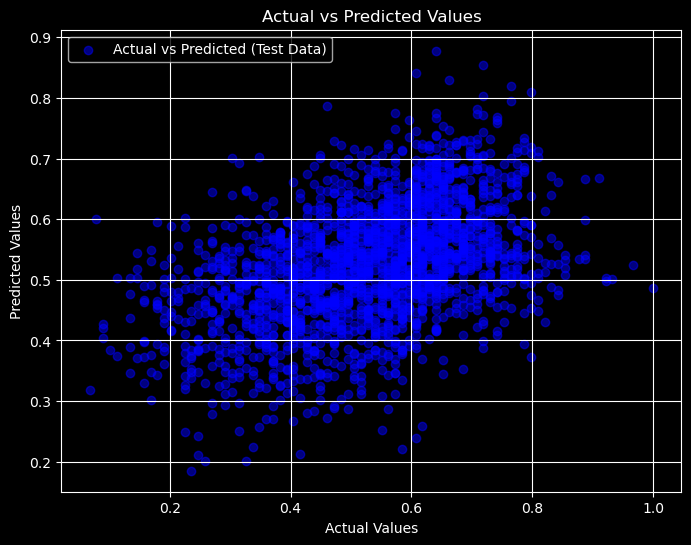

In [66]:
# Create a scatter plot for the test data
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred_test, alpha=0.5, color='blue', label='Actual vs Predicted (Test Data)')
plt.title('Actual vs Predicted Values')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.legend()
plt.grid(True)

# Show the plot
plt.show()

The scatter plot likely shows a scattered pattern of points away from the diagonal line, 

which aligns with the negative Test R^2 and non-ideal Test MSE. 

These results collectively suggest that the Linear Regression model is not a good fit for predicting movie ratings 

and may require improvement, such as exploring more complex models or refining feature selection and engineering.

# Second Model: Random Forest Model

A Random Forest is an ensemble machine learning technique that combines multiple decision trees 

to make more accurate predictions or classifications.

Random Forest's ability to handle complexity, noise, and non-linearity, along with its feature importance analysis, 

makes it a suitable choice for the movie rating prediction.

In [67]:
# Create a Random Forest Regressor model
rf_model = RandomForestRegressor(random_state=42)

# Fit the model on the training data
rf_model.fit(X_train, y_train)

# Make predictions on the test data
y_pred_test = rf_model.predict(X_test)
y_pred_train = rf_model.predict(X_train)

C:\Users\DELL\anaconda3\Lib\site-packages\sklearn\base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


# Random Forest model Evaluation

In [68]:
# Evaluate the model
mse_test = mean_squared_error(y_test, y_pred_test)
r2_test = r2_score(y_test, y_pred_test)
mse_train = mean_squared_error(y_train, y_pred_train)
r2_train = r2_score(y_train, y_pred_train)

print("Random Forest Regressor Model Evaluation:")
print(f"Test Mean Squared Error: {mse_test}")
print(f"Test R-squared (R^2) Score: {r2_test}")
print(f"Train Mean Squared Error: {mse_train}")
print(f"Train R-squared (R^2) Score: {r2_train}")

Random Forest Regressor Model Evaluation:
Test Mean Squared Error: 0.015928808092375697
Test R-squared (R^2) Score: 0.3164685406389469
Train Mean Squared Error: 0.002355830705301668
Train R-squared (R^2) Score: 0.8994964674176646


The Random Forest model demonstrates significant improvements from the baseline model. 

It achieves a considerably lower Test MSE of 0.0166 and a positive Test R-squared score , 

indicating more accurate predictions and a much better fit to the test data. 

The Random Forest model also maintains a strong performance on the training data with a Train R-squared 

(Train R^2) score of 0.896, suggesting that it avoids overfitting.

# Third Model: Gradient Boosting Regressor

In [69]:
# Create a Gradient Boosting Regressor model
gb_model = GradientBoostingRegressor(random_state=42)

# Fit the model on the training data
gb_model.fit(X_train, y_train)

# Make predictions on the test data
y_pred_test = gb_model.predict(X_test)
y_pred_train = gb_model.predict(X_train)

C:\Users\DELL\anaconda3\Lib\site-packages\sklearn\ensemble\_gb.py:424: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


# Model Evaluation

In [70]:
# Evaluate the model
mse_test = mean_squared_error(y_test, y_pred_test)
r2_test = r2_score(y_test, y_pred_test)
mse_train = mean_squared_error(y_train, y_pred_train)
r2_train = r2_score(y_train, y_pred_train)

print("Gradient Boosting Regressor Model Evaluation:")
print(f"Test Mean Squared Error: {mse_test}")
print(f"Test R-squared (R^2) Score: {r2_test}")
print(f"Train Mean Squared Error: {mse_train}")
print(f"Train R-squared (R^2) Score: {r2_train}")

Gradient Boosting Regressor Model Evaluation:
Test Mean Squared Error: 0.017397743710507674
Test R-squared (R^2) Score: 0.2534340875306963
Train Mean Squared Error: 0.016082418329815617
Train R-squared (R^2) Score: 0.31389812902264735


The Gradient Boosting Regressor model performs better in comparison to the baseline model.

It achieves a substantially lower Test MSE of 0.0172, indicating reduced prediction errors. 

The Test R-squared score is 0.243, indicating an improved model fit to the test data. Additionally, 

the model maintains reasonable performance on the training data, with a Train MSE of 0.016 and a Train R-squared score of 0.3, 

which suggests better generalization.

# Model Comparison


Both Gradient Boosting and Random Forest models outperform the baseline model in terms of Test MSE and Test R^2. 

The Random Forest model, in particular, provides a slightly better fit to the data than the Gradient Boosting model.

Additionally, all models exhibit low Train MSE, but the baseline model shows signs of overfitting.

Random forest model will be further hypeparameter tuned to get better results

# Hyperparameter Tuning of Random forest model

In [72]:
# Define the hyperparameter grid
param_grid = {
    'n_estimators': [10, 20, 50],
    'max_depth': [None, 3, 10, 20],
    'min_samples_split': [1, 3, 5],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['auto', 'sqrt']
}


# Create a Random Forest Regressor model
rf_model = RandomForestRegressor(random_state=42)

# Create a GridSearchCV object
grid_search = GridSearchCV(rf_model, param_grid, cv=5, n_jobs=-1, scoring='neg_mean_squared_error')

# Fit the grid search to the training data
grid_search.fit(X_train, y_train)

# Get the best parameters
best_params = grid_search.best_params_
print("Best Hyperparameters:", best_params)

# Get the best model
best_rf_model = grid_search.best_estimator_

# Make predictions on the test data
y_pred_test = best_rf_model.predict(X_test)
y_pred_train = best_rf_model.predict(X_train)

C:\Users\DELL\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:425: FitFailedWarning: 
720 fits failed out of a total of 1080.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
335 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\DELL\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py", line 732, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\DELL\anaconda3\Lib\site-packages\sklearn\base.py", line 1144, in wrapper
    estimator._validate_params()
  File "C:\Users\DELL\anaconda3\Lib\site-packages\sklearn\base.py", line 637, in _validate_params
    validate_parameter_constraints(
  File "C:\Users\DELL\anaconda3\Lib\site-packages\s

Best Hyperparameters: {'max_depth': None, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 3, 'n_estimators': 50}


In [73]:
# Evaluate the model on the test data
mse_test = mean_squared_error(y_test, y_pred_test)
r2_test = r2_score(y_test, y_pred_test)

# Evaluate the model on the training data
mse_train = mean_squared_error(y_train, y_pred_train)
r2_train = r2_score(y_train, y_pred_train)

print("Tuned Random Forest Regressor Model Evaluation (Test Data):")
print(f"Test Mean Squared Error: {mse_test}")
print(f"Test R-squared (R^2) Score: {r2_test}")

print("Tuned Random Forest Regressor Model Evaluation (Training Data):")
print(f"Train Mean Squared Error: {mse_train}")
print(f"Train R-squared (R^2) Score: {r2_train}")

Tuned Random Forest Regressor Model Evaluation (Test Data):
Test Mean Squared Error: 0.01663485317198122
Test R-squared (R^2) Score: 0.2861709803419872
Tuned Random Forest Regressor Model Evaluation (Training Data):
Train Mean Squared Error: 0.0027700917407643957
Train R-squared (R^2) Score: 0.8818234243668531


# Most important features

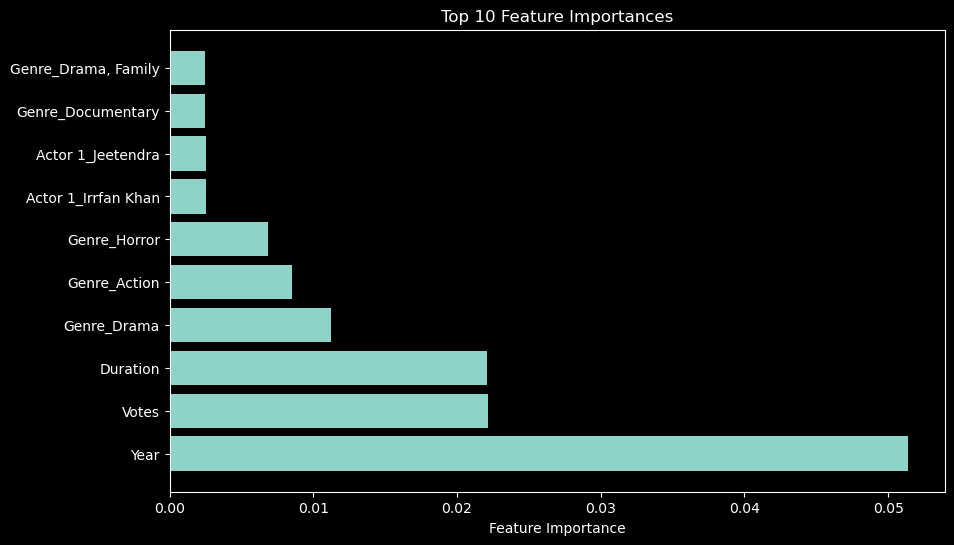

In [74]:
# Get feature importances from the best model
feature_importances = best_rf_model.feature_importances_

# Get the column names of your feature data 
feature_names = X_final.columns 
# Sort feature importances in descending order and get the top 10 features
top_indices = np.argsort(feature_importances)[::-1][:10]
top_features = [feature_names[i] for i in top_indices]
top_importances = [feature_importances[i] for i in top_indices]

# Create a bar plot to visualize feature importances
plt.figure(figsize=(10, 6))
plt.barh(range(10), top_importances, align='center')
plt.yticks(range(10), top_features)
plt.xlabel('Feature Importance')
plt.title('Top 10 Feature Importances')
plt.show()

In [ ]:
Conclusion
In conclusion, this project provides valuable insights and a predictive model for movie rating prediction. The film industry can benefit from these findings to make data-driven decisions regarding movie production, casting, and marketing. The most influential factors identified are the year of release, the number of votes, and movie duration.

Next Steps
Model Refinement: Further refine the predictive model, exploring advanced machine learning techniques and algorithms for improved rating predictions.
Feature Engineering: Experiment with additional features or feature transformations that could enhance the model's performance.
User Reviews Analysis: Incorporate user reviews and sentiment analysis to gain deeper insights into audience reactions.
Real-time Data: Develop mechanisms for real-time data updates to keep the model current with the latest movie releases and trends.